# **Séance 5 — Modélisation de bruit dans le cadre de transit exoplanétaire, et application sur de vraies données**

Dans le cadre général, lors de l'étude de phénomènes physiques, l'acquisition de **données expérimentales** est affectée par du **bruit** (https://fr.wikipedia.org/wiki/Bruit), que l'on définit comme un signal **parasite** qui vient perturber notre mesure. 

Lors d'**observations astronomiques**, ce bruit peut provenir de plusieurs sources : instrumentation, conditions atmosphériques, sources lumineuses en arrière-plan, rayons cosmiques, bruit de photons lié à la nature quantique de la lumière, etc. Ce bruit peut masquer ou altérer les signaux que nous cherchons à détecter, comme les **transits d'exoplanètes**.

Une façon de surmonter ce problème est de modéliser le bruit et de l'inclure dans nos simulations. Cela nous permet de mieux comprendre comment le bruit affecte nos observations et de développer des méthodes pour le réduire ou le compenser. 

Aujourd'hui, nous allons **modéliser le bruit** dans le cadre de la détection de transits d'exoplanètes, et **appliquer** notre modélisation sur de **vraies données** d'observations astronomiques.

---

## **Objectifs pédagogiques**

Dans cette séance, vous allez :
- **Générer** différents types de bruits avec les fonctions de la bibliothèque `numpy.random`.
- **Simuler** des courbes de lumière de transits d'exoplanètes en y ajoutant du bruit de mesure.
- **Estimer** l'incertitude autour de vos paramètres ajustés à l'aide de la matrice de covariance retournée par `curve_fit`.
- **Analyser** des données d'observation réelles et estimer les paramètres physiques à l'aide de modèles numériques. 


---

# **Exercice 0.1 - Import des librairies**

# **Exercice 0.2 - Générateur de bruits**

La bibliothèque `numpy.random` offre plusieurs fonctions pour générer des nombres **pseudo-aléatoires** suivant différentes distributions statistiques, ce qui nous permet de simuler différents types de bruits (bruit gaussien, bruit blanc, bruit de Poisson, etc.)

Par exemple, la fonction `numpy.random.rand` ([documentation](https://numpy.org/doc/stable/reference/random/generated/numpy.random.rand.html)) génère des nombres aléatoires uniformément distribués entre 0 et 1, tandis que la fonction `numpy.random.normal` ([documentation](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html)) génère des nombres aléatoires suivant une distribution gaussienne (normale) avec une moyenne et un écart-type spécifiés.

Voici un exemple d'utilisation de la fonction `numpy.random.rand` pour générer un tableau de 10 nombres pseudo-aléatoires entre 0 et 1 :

```python
import numpy as np  
bruit_blanc = np.random.rand(5)
print(bruit_blanc)
```

**1. Générez un tableau de 1000 nombres pseudo-aléatoires distribués uniformément de 0 à 1.**

**2. Générez un tableau de 1000 nombres pseudo-aléatoires suivant une distribution gaussienne de moyenne $\mu=10$ et d'écart-type $\sigma=2$.**

**3. Calculez et affichez la moyenne des deux tableaux avec la fonction `np.mean`. Les moyennes sont-elles cohérentes ?**

**4. Calculez et affichez l'écart-type des deux tableaux avec la fonction `np.std`. Les écarts-types sont-ils cohérents ?**

**5. Exécutez à plusieurs reprises les cellules de code ci-dessus. Observez-vous des variations dans les moyennes et les écarts-types ? Pourquoi ?**

In [ ]:
# 1. Génération du tableau de bruit blanc

# 2. Génération du tableau de bruit gaussien

# 3. Calcul des moyennes

# 4. Calcul des écarts-types


Moyenne du bruit blanc : 0.4980
Moyenne du bruit gaussien : 9.9699
Écart-type du bruit blanc : 0.2870
Écart-type du bruit gaussien : 2.0028


# **Exercice 0.3 - Visualisation du bruit avec un histogramme**

Une façon de visualiser la distribution d'un ensemble de données est d'utiliser un **histogramme**. En utilisant la fonction `matplotlib.pyplot.hist`, vous pouvez créer un histogramme pour visualiser la distribution de vos données de bruit. Voici un exemple d'utilisation de `plt.hist` pour visualiser la distribution d'un tableau de données sur **30 bins (intervalles)** :

```python
# Création de l'histogramme
plt.figure()
plt.hist(bruit, bins=20, color='g')
plt.xlabel('Valeur du bruit')
plt.ylabel('Nombres de valeurs dans chaque bin')
plt.show()
```

**1. Visualisez à l'aide d'un histogramme le bruit blanc généré précedemment (ajuster les paramètres d'affichage à votre convenance).**

**2. Faites de même pour le bruit gaussien généré précedemment (ajuster les paramètres d'affichage à votre convenance).**

**Astuce :** À l'aide de la fonction `plt.axvline`, ajoutez la valeur moyenne aux graphiques.

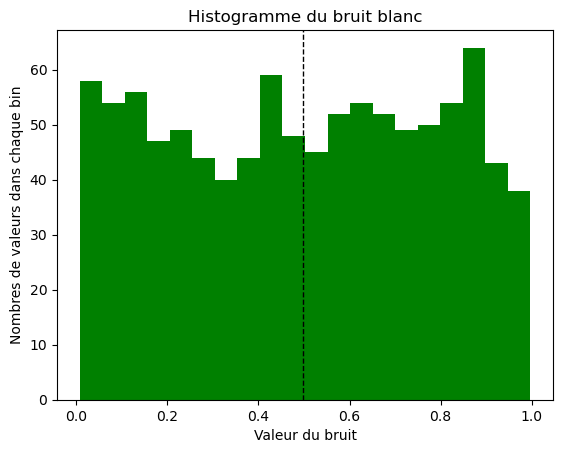

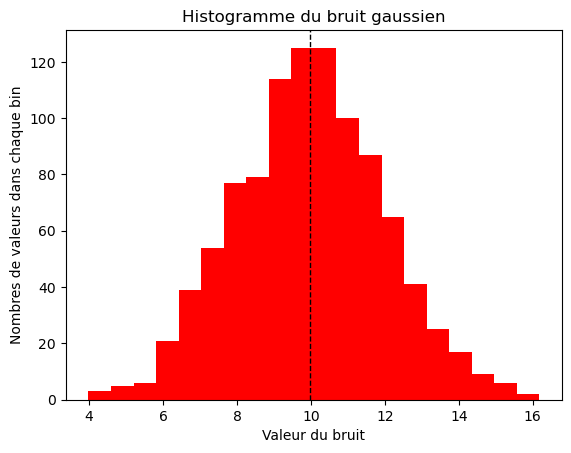

In [ ]:
# 1. Visualisation du bruit blanc en histogramme

# 2. Visualisation du bruit gaussien en histogramme

# **Exercice 1.1 - Modélisation du transit planétaire de Jupiter**

Comme nous l'avons vu lors de la séance précédente, le **transit d'une exoplanète** devant son étoile hôte provoque une **diminution temporaire** de la luminosité de l'étoile (vous pouvez voir une animation ici : https://en.wikipedia.org/wiki/File:Transit_method_variable-size_planet_4K.webm).

L'intensité de la diminution de la luminosité dépend majoritairement du **rayon de l'exoplanète** par rapport au **rayon de l'étoile**. Ainsi, on peut utiliser la fonction `luminosite_transit` qui se trouve dans le fichier `transits.py`. Cette fonction modélise la courbe de lumière d'une étoile durant un transit d'exoplanète.

Vous pouvez l'importer dans votre notebook avec la ligne suivante :

```python
from transits import luminosite_transit
```

**1. Générez un tableau de temps allant de 0 à 100 jours avec un pas d'une observation par jour avec la fonction de votre choix (`np.linspace`, `np.arange`, etc.).**

**2. Utilisez la fonction `luminosite_transit` pour simuler le flux lumineux du Soleil sur cette période de temps avec un transit planétaire de Jupiter allant du jour 20 au jour 50. (pensez à utiliser `astropy.constants`).**

**3. Affichez la courbe de lumière simulée à l'aide de `matplotlib`.**

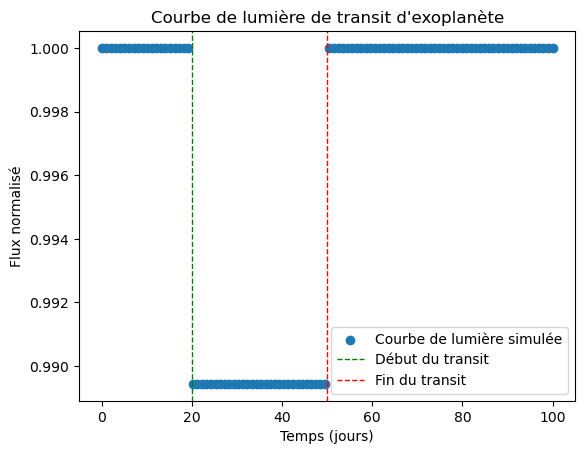

In [ ]:
# 1. Génération du tableau de temps

# 2. Simulation d'une courbe de lumière de transit d'exoplanète

# 3. Affichage de la courbe de lumière simulée

# **Exercice 1.2 - Ajout de bruit gaussien**

Comme indiqué plus haut, les données d'observations astronomiques sont affectées par du bruit de différentes natures. Pour simuler des données plus réalistes, nous allons ajouter du bruit gaussien à notre courbe de lumière simulée. 

**1. Générez un tableau de bruit gaussien ($\mu=0$ ; $\sigma=8\times10^{-5}$) de même taille que votre tableau de temps.**

**Astuce :** Vous pouvez utiliser la fonction native de python `len()` pour obtenir la taille de votre tableau de temps.

**2. Ajoutez ce bruit à votre courbe de lumière simulée.**

**3. Avec `matplotlib`, affichez la courbe de lumière simulée avec le bruit ajouté (`plt.scatter()` sera plus approprié que `plt.plot()` ici).**

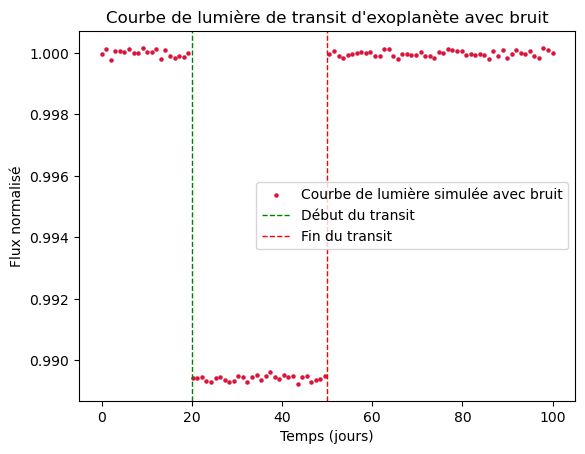

In [ ]:
# 1. Génération du tableau de bruit gaussien

# 2. Ajout du bruit à la courbe de lumière simulée

# 3. Affichage de la courbe de lumière simulée avec bruit

# **Exercice 1.3 - Estimation du rayon de Jupiter**

Vous allez maintenant essayer d'estimer le rayon de Jupiter à partir de votre courbe de lumière simulée avec du bruit. Pour cela, vous allez séparer les données de votre courbe de lumière en deux parties : les données **hors transit** (avant le jour 20 et après le jour 50) et les données **en transit** (entre le jour 20 et le jour 50).

**1. À l'aide d'opérateurs booléens, créez un masque de booléens qui permet de ne garder que les valeurs de temps dans l'intervalle \[20, 50\[ jours.**

**2. Appliquez ce masque à votre tableau de flux lumineux bruité pour ne garder que les données en transit.**

**3. Utilisez l'opérateur de négation `~` pour créer un masque qui permet de ne garder que les données hors transit, et appliquez-le à votre tableau de flux lumineux bruité.**

**Exemple:** ```~np.array([False])``` donnera ```array([True])``` et ```~np.array([True])``` donnera ```array([False])```.

**4. Calculez les valeurs moyennes de flux lumineux en transit et hors transit à l'aide de la fonction `np.mean`.**

Ici, les valeurs moyennes de flux lumineux en transit et hors transit correspondent à respectivement $F_\mathrm{obs, transit}$ et $F_\mathrm{obs}$, tels que définits en séance 4 :

$$
    F_\mathrm{obs, transit} = F_\mathrm{obs} \times (1 - K)
$$

avec le rapport $K$ qui est défini comme le rapport au carré du rayon de la planète $R_\mathrm{planète}$ sur le rayon du Soleil $R_\odot$, tel que : 

$$
    K = \left( \frac{R_\mathrm{planète}}{R_\odot} \right) ^2
$$

**5. En utilisant la valeur du rayon du Soleil tabulée dans `astropy.constants`, utilisez les valeurs de moyennes pour estimer le rayon de Jupiter à partir de notre simuilation bruitée. Comparez avec un écart relatif votre estimation du rayon de Jupiter à sa valeur tabulée dans `astropy.constants`.**

In [ ]:
# 1. Génération du masque booléen pour les données de transit

# 2. Application du masque pour extraire les données de transit

# 3. Génération et application du masque complémentaire pour les données hors transit

# 4. Calcul des moyennes pour les données de transit et hors transit

# 5. Estimation du rayon de Jupiter


Rayon de Jupiter estimé : 71509494.07107864 m ; Rayon de Jupiter réel : 71492000.0 m ; Erreur relative : 0.0245%


# **Exercice 1.4 - Définir la fonction d'estimation du rayon de la planète**

Afin de faciliter l'estimation du rayon de la planète à partir de différentes courbes de lumière simulées, vous allez définir une fonction qui effectue toutes les étapes que vous venez de programmer.

**1. Définissez une fonction `calcul_rayon_planete()` qui prend en argument `t`, `t_start`, `t_end`, `flux`, et `R_etoile`, respectivement le temps, le temps de début du transit, le temps final du transit, la courbe de lumière du transit planétaire, et le rayon de l'étoile. Cette fonction retournera le rayon estimé de la planète.**

**2. Testez votre fonction `calcul_rayon_planete()` sur la courbe de lumière simulée avec du bruit que vous avez générée précédemment.**

In [ ]:
# 1. Définition de la fonction d'estimation du rayon de la planète

# 2. Test de la fonction d'estimation du rayon de la planète

Rayon de Jupiter estimé : 71509494.07107864 m ; Rayon de Jupiter réel : 71492000.0 m ; Erreur relative : 0.0245%


# **Exercice 2.1 - Modélisation bruitée du transit planétaire de la Terre**

De la même manière que dans l'exercice précédent, vous allez modéliser le transit de la Terre devant le Soleil, en y ajoutant un bruit gaussien =. 

**1. Modélisez la courbe de lumière du transit planétaire de la Terre.**

**2. Ajoutez un bruit gaussien ($\mu=0$ ; $\sigma=8\times10^{-5}$) à votre courbe de lumière simulée.**

**3. Affichez la courbe de lumière bruitée avec `matplotlib`**

**4. Utilisez votre fonction `calcul_rayon_planete()` pour estimer le rayon de la Terre à partir de votre courbe de lumière simulée avec du bruit. Comparez avec un écart relatif votre estimation du rayon de la Terre à sa valeur tabulée dans `astropy.constants`. Exécutez la cellule à plusieurs reprises. Avez-vous confiance en ce résultat ?**



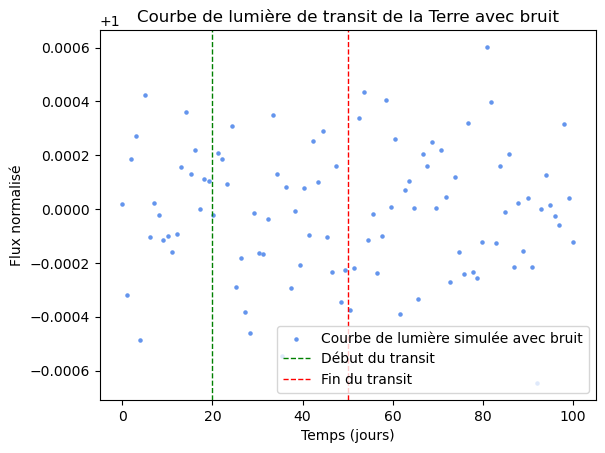

Rayon de la Terre estimé : 5539727.30975718 m ; Rayon de la Terre réel : 6378100.0 m ; Erreur relative : 13.1446%


In [ ]:
# 1. Modélisation de la courbe de lumière du transit de la Terre

# 2. Ajout du bruit gaussien à la courbe de lumière simulée

# 3. Affichage de la courbe de lumière bruitée

# 4. Estimation du rayon de la Terre à partir de la courbe de lumière simulée avec du bruit


# **Exercice 2.2 - Estimation des incertitudes**

Dans le fichier `transits.py`, vous trouverez une fonction `incertitude_rayon_planete()` qui permet d'estimer l'incertitude sur le rayon de la planète en propageant les incertitudes sur le flux lumineux liées au bruit de mesure. 

**1. Utilisez cette fonction poru estimer l'incertitude sur votre calcul du rayon de Jupiter. Effectuez le rapport de l'incertitude sur la moyenne, et affichez-le.**

**2. Faites de même pour l'estimation du rayon de la Terre.**

**3. Comparez les rapports d'incertitude sur la moyenne que vous avez obtenus pour Jupiter et pour la Terre. Expliquez les différences que vous observez. Quelle méthode pourrions-nous mettre en place pour avoir une meilleure estimation du rayon de la Terre ?**

In [ ]:
# 1. Estimation de l'incertitude sur le rayon de Jupiter

# 2. Estimation de l'incertitude sur le rayon de la Terre

Incertitude sur le rayon de Jupiter : 4.32e+05 m ; Rapport incertitude sur la moyenne : 0.6046%
Incertitude sur le rayon de la Terre : 1.43e+07 m ; Rapport incertitude sur la moyenne : 258.4820%


# **Exercice 2.3 - Multiplication des observations**

Nous allons simuler plusieurs observations du transit de la Terre devant le Soleil, en générant plusieurs courbes de lumière simulées avec du bruit gaussien. L'objectif sera de concaténer ces courbes de lumière pour nous aider de la statistique afin de réduire l'incertitude sur notre estimation du rayon.

Pour ce faire, nous allons utiliser la méthode `append()` des listes pour stocker nos différentes courbes de lumière simulées avec du bruit, et les concaténer à la fin pour faire une estimation plus robuste du rayon de la Terre. Basez-vous sur cet exemple de code pour répondre aux questions suivantes :

```python
# Initialisation des listes vides
liste1 = []
liste2 = []

for i in range(10):
    # Génération des données simulées
    data1 = np.random.normal(loc=0, scale=1, size=100)
    data2 = np.arange(100)

    # Ajout de la courbe à la liste
    liste1.append(data1)
    liste2.append(data2)

# Concaténation des courbes
courbe1_concatenee = np.concatenate(liste1)
courbe2_concatenee = np.concatenate(liste2)
```

**1. Créez une liste vide dans laquelle vous allez stocker vos différentes courbes de lumière simulées avec du bruit. Créez une autre liste vide qui contiendra les valeurs de temps.**

**2. A l'aide d'une boucle `for` et de la méthode `.append()`, générez 1000 courbes de lumière simulées du transit de la Terre devant le Soleil, en y ajoutant à chaque fois un bruit gaussien ($\mu=0$ ; $\sigma=8\times10^{-5}$).**

**3. Concaténez vos 1000 courbes de lumière simulées avec du bruit en une seule courbe de lumière avec la fonction `np.concatenate()`. Faites de même pour les valeurs de temps.**

**4. Avec `matplotlib`, affichez les 1000 courbes de lumière simulées avec du bruit.**

**5. Estimez le rayon de la Terre à partir de la concaténation de vos 1000 courbes de lumière. Comparez avec un écart relatif votre estimation du rayon de la Terre à sa valeur tabulée dans `astropy.constants`.**

**6. Estimez l'incertitude sur votre estimation du rayon de la Terre à partir de la concaténation de vos 1000 courbes de lumière simulées avec du bruit. Avez-vous confiance en votre résultat sur le rayon de la Terre ?**

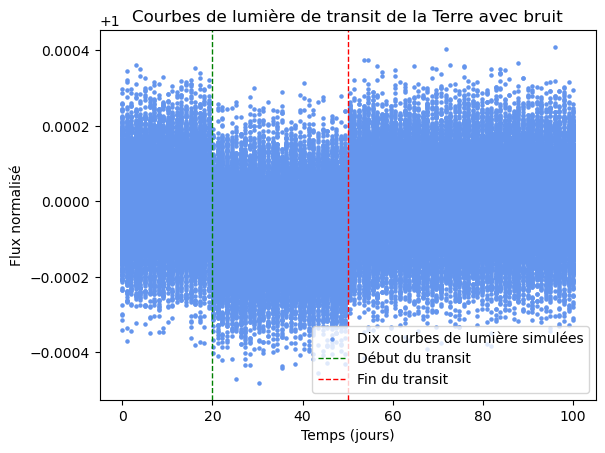

Rayon de la Terre estimé à partir de 1000 courbes de lumière simulées avec du bruit : 6343375.89501768 m ; Rayon de la Terre réel : 6378100.0 m ; Erreur relative : 0.5444%
Incertitude sur le rayon de la Terre : 1.69e+05 m ; Rapport incertitude sur la moyenne : 2.6581%


In [ ]:
# 1. Création des listes vides

# 2. Remplissage des listes avec les données de flux et de temps

# 3. Concatenation des listes

# 3. Affichage de toutes les courbes de lumière simulées avec du bruit

# 4. Estimation du rayon de la Terre

# 5. Estimation de l'incertitude sur le rayon de la Terre


# **Exercice 3.1 - Estimation du rayon d'une exoplanète orbitant autour de Kepler-69**

Vous allez maintenant tester votre fonction d'estimation du rayon de la planète sur de vraies données d'observations astronomiques. Nous allons utiliser les données de l'étoile Kepler-69, qui est connue pour héberger au moins deux exoplanète (Kepler-69b et Kepler-69c). 

**1. Avec la fonction `np.load()`, chargez le fichier `courbe_lumiere_kepler.npy` qui contient deux colonnes : l'une contenant les valeurs de temps, l'autre des valeurs de flux observés lors d'un transit devant Kepler-69. Ce fichier contient plusieurs transits superposés.**

**2. Affichez la courbe de lumière de Kepler-69 à l'aide de `matplotlib`.**

**3. Comme vous pouvez le voir, le temps a été normalisé pour que le transit de Kepler-69b soit centré sur 0. Le transit commence à -0.1 jours, et termine à 0.1 jours. Le rayon de Kepler est de $R_\mathrm{Kepler69} = 0.93 \times R_\mathrm{soleil}$.**

**Utilisez votre fonction `calcul_rayon_planete()` pour estimer le rayon de Kepler-69b à partir de cette courbe de lumière. Affichez la valeur.**

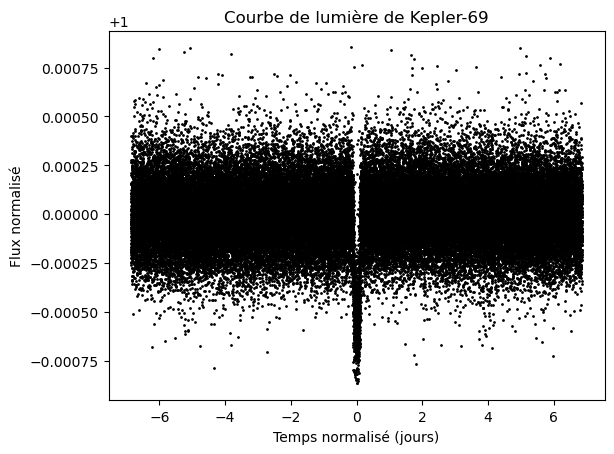

Rayon de Kepler-69b estimé : 1.40e+07 m


In [ ]:
# 1. Chargement des données

# 2. Visualisation de la courbe de lumière de Kepler-69

# 3. Estimation du rayon de la planète 


# **Exercice 3.2 - Identification de l'exoplanète**

La Tableau 1 ci-dessous présente les paramètres physiques de Kepler-69b et Kepler-69c, et notamment le rapport de leur rayon sur le rayon de Kepler-69. 

<figure style="text-align: center;">
  <img src="tableau_kepler.png" alt="Paramètres physiques de Kepler-69b et Kepler-69c" style="width: 800px; height: auto;" />
  <figcaption>Tableau 1 : Paramètres physiques de Kepler-69b et Kepler-69c.</figcaption>
    <a href="https://iopscience.iop.org/article/10.1088/0004-637X/768/2/101#apj467677s3" target="_blank">[https://iopscience.iop.org/article/10.1088/0004-637X/768/2/101#apj467677s3]</a>.
</figure>

**1. Calculez le rapport du rayon de l'exoplanète estimé avec votre fonction et le rayon de l'étoile Kepler-69.** 

**2. Estimez l'incertitude sur votre estimation du rayon de l'exoplanète à partir de la courbe de lumière de Kepler-69. Calculez le rapport sur le rayon de l'étoile.**

**3. Est-ce que votre mesure de rayon est compatible avec l'une des valeurs tabulées dans le Tableau 1 ? Si oui, identifiez l'exoplanète qui transite devant Kepler-69 dans les données que vous venez d'analyser.**

In [ ]:
# 1. Calcul du rapport du rayon de la planète à celui de l'étoile

# 2. Estimation de l'incertitude sur le rayon de la planète

# 3. Identification de la nature de Kepler-69b


Rapport du rayon de la planète à celui de l'étoile : 0.021595199867698926
Incertitude sur le rayon : 1.97e+06 m ; Rapport incertitude sur la moyenne : 0.003047404687167327
La valeur de rayon est compatible avec la valeur tabulée de Kepler-69b


# Exercice 4 - Pour aller plus loin : ajustement de la courbe de lumière de Kepler-69b à l'aide de `scipy.optimize.curve_fit`

Dans les exercices précédents, vous avez utilisé une méthode de séparation des données en transit et hors transit pour estimer le rayon de l'exoplanète. Cependant, il existe d'autres méthodes plus robustes pour ajuster un modèle à des données observés, notamment l'utilisation de la fonction `curve_fit` de la bibliothèque `scipy.optimize`.

Explorez la documentation de `curve_fit` ([https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html)) et utilisez-la pour ajuster la fonction `luminosite_transit` à la courbe de lumière de Kepler-69b que vous avez analysée précédemment.